# Keras API Project

## The Data

I will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club


LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

###  Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), building a model that can predict wether or nor a borrower will pay back their loan? 

The "loan_status" column contains our label.



In [148]:
import pandas as pd

In [149]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [150]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [151]:
def feature_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [152]:
feature_info('purpose')

A category provided by the borrower for the loan request. 


## Loading the data and other imports

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [154]:
df = pd.read_csv('lending_club_loan_two.csv')

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  



#  Exploratory Data Analysis




<AxesSubplot:xlabel='loan_status', ylabel='count'>

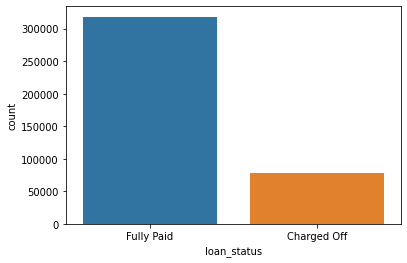

In [156]:
sns.countplot(data = df, x= 'loan_status')  # to see label values

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

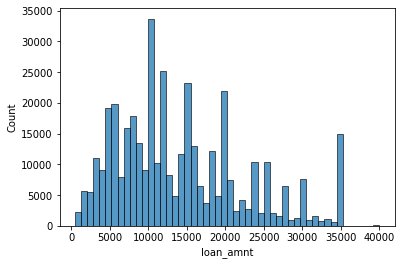

In [157]:
#histogram of the loan_amnt column
sns.histplot(data = df, x ='loan_amnt', bins= 50)  

In [158]:
df.corr()    # correlation between the continuous feature variables

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


In [12]:
# Visualizing correlation using heatmap

<AxesSubplot:>

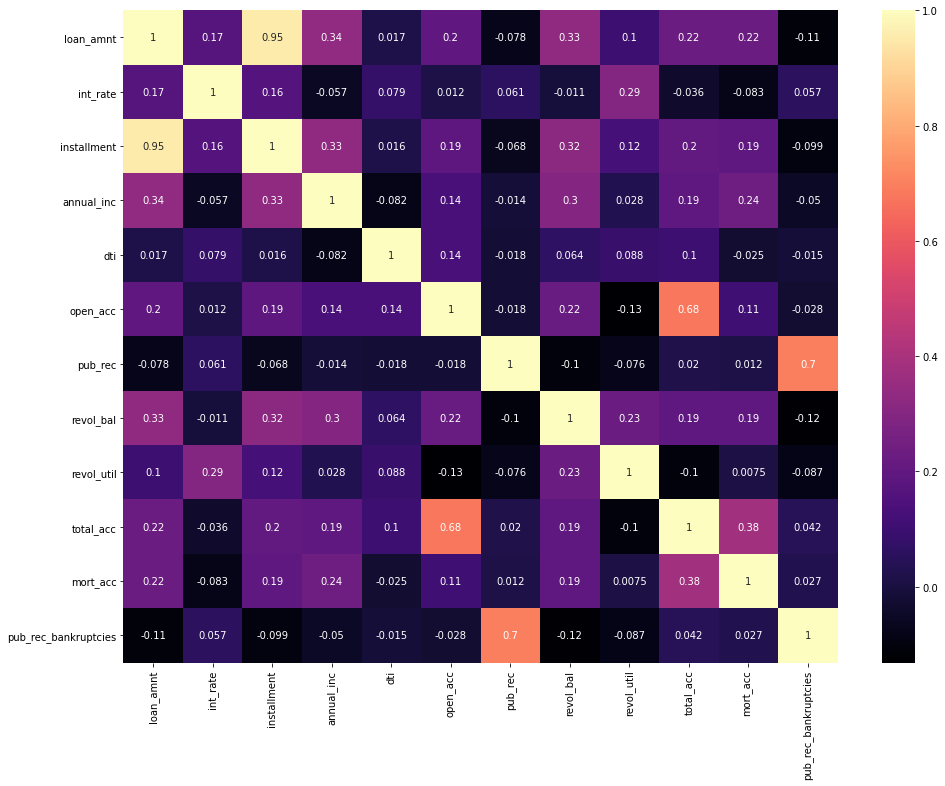

In [159]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap='magma')

By seeing at above heatmap I can say installment and loan amount are highly correlated.

In [160]:
feature_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [161]:
feature_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

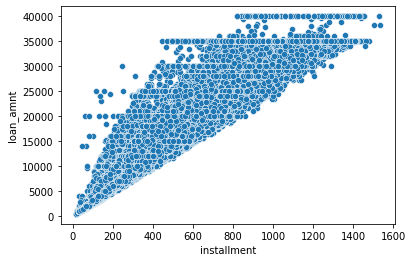

In [162]:
sns.scatterplot(x='installment', y = 'loan_amnt', data=df)

In [163]:
# the relationship between the loan_status and the Loan Amount

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

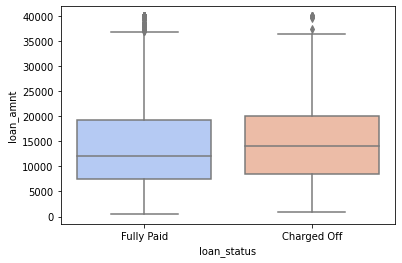

In [164]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df,palette='coolwarm')

In [165]:
#summary statistics for the loan amount, grouped by the loan_status

In [166]:
(df.groupby('loan_status').describe()).transpose()

loan_status                  Charged Off     Fully Paid
loan_amnt            count  77673.000000  318357.000000
                     mean   15126.300967   13866.878771
                     std     8505.090557    8302.319699
                     min     1000.000000     500.000000
                     25%     8525.000000    7500.000000
...                                  ...            ...
pub_rec_bankruptcies min        0.000000       0.000000
                     25%        0.000000       0.000000
                     50%        0.000000       0.000000
                     75%        0.000000       0.000000
                     max        8.000000       8.000000

[96 rows x 2 columns]

In [167]:
# the unique possible grades and subgrades

In [168]:
Ug = df['grade'].unique()
Ug.sort()
Ug

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [169]:
Us = df['sub_grade'].unique()
Us.sort()
Us

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [170]:
# a countplot per grade wrt loan status

<AxesSubplot:xlabel='grade', ylabel='count'>

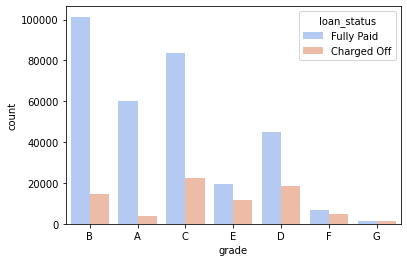

In [171]:
sns.countplot(x='grade',hue='loan_status',data=df,palette='coolwarm')

In [172]:
# a count plot per subgrade

C:\Users\madhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

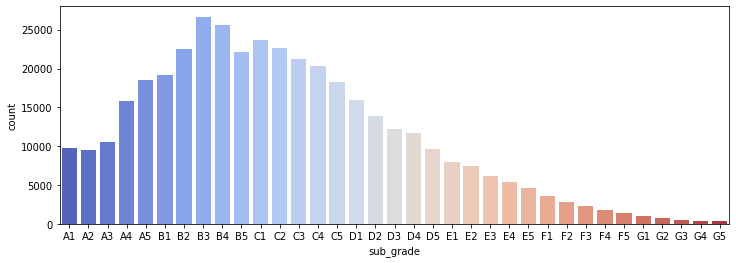

In [173]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(df['sub_grade'],palette='coolwarm', order=subgrade_order)

In [174]:
# a count plot per subgrade wrt loan status

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

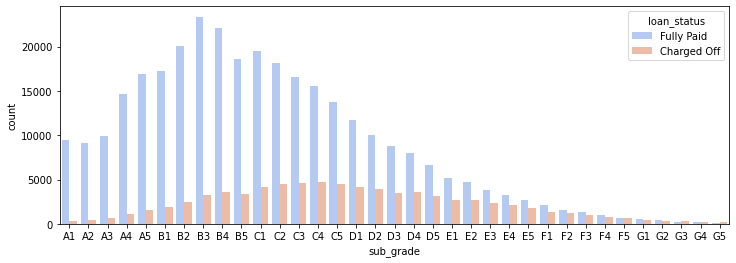

In [175]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x ='sub_grade',hue = 'loan_status',data = df,palette='coolwarm', order=subgrade_order)

In [176]:
# It looks like F and G subgrades don't get paid back that often. 
# Countplot for these two grades


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

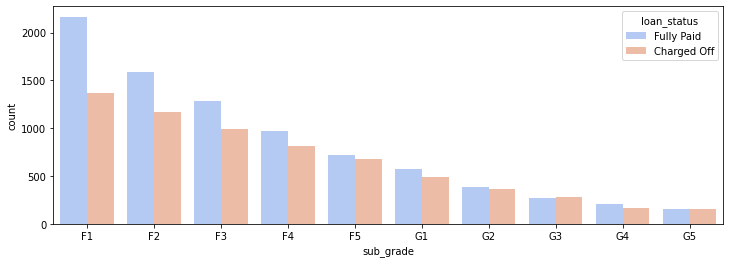

In [177]:
F_G = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(F_G['sub_grade'].unique())
sns.countplot(x ='sub_grade',hue = 'loan_status',data = F_G,palette='coolwarm', order=subgrade_order)

In [ ]:
'''creating a new column 
if loan status is "Fully Paid" -> 1
id loan status is "Charged Off" -> 0 '''

In [180]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0}) 

In [181]:
df['loan_repaid'].head()

0    1
1    1
2    1
3    1
4    0
Name: loan_repaid, dtype: int64

In [182]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [183]:
# a bar plot showing the correlation of the numeric features to the new loan_repaid column.

<AxesSubplot:>

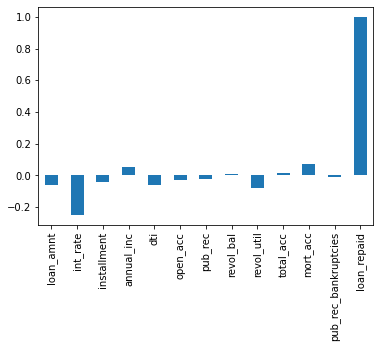

In [184]:
df.corr()['loan_repaid'].plot(kind='bar')

<AxesSubplot:>

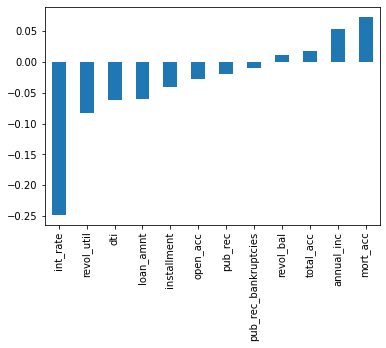

In [185]:
# sorting loan repaid values and dropping loan_repaid because it is highly correlated column
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

Interest rate has the highest negative correlation, If interest rate is high  its difficult to pay the loan.


#  Data PreProcessing



In [186]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


## Missing Data



In [187]:
len(df)                # length of dataframe

396030

In [188]:
df.isnull().sum()       # count of missing values per column

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [189]:
#converting missing values in terms of percentage of total Dataframe

In [190]:
100 * df.isnull().sum() / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [191]:
# emp_title and emp_length has arount 4% to 5% of the missing data

In [192]:
feature_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [193]:
feature_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [194]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [195]:
df['emp_title'].nunique()

173105

In [196]:
df['emp_title'].value_counts()

Teacher                                 4389
Manager                                 4250
Registered Nurse                        1856
RN                                      1846
Supervisor                              1830
                                        ... 
Navy Contractor - Junior Analyst           1
Workers comp field investigator            1
Dir. of Marketing & Sales                  1
Market Development                         1
Sr. Customer Services Representative       1
Name: emp_title, Length: 173105, dtype: int64

Its difficult to create dummy variables for 173105 number of emp_title so I am going to drop this column

In [197]:
df = df.drop('emp_title', axis=1)

In [198]:
#Create a count plot of the emp_length column in ascending order

In [199]:
Emp_unique = df['emp_length'].dropna().unique()
Emp_unique

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

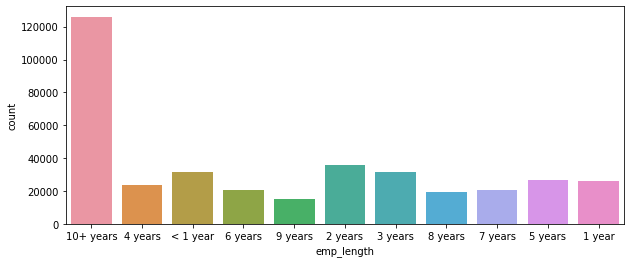

In [200]:
plt.figure(figsize=(10,4))
sns.countplot(x='emp_length',data=df)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

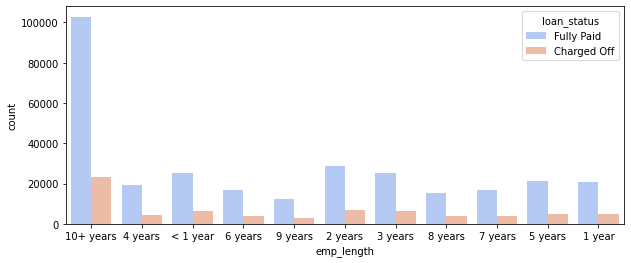

In [201]:
plt.figure(figsize=(10,4))
sns.countplot(x='emp_length',data=df, hue='loan_status', palette='coolwarm')

In [202]:
# let's find out number of people wrt their loan status

In [203]:
emp_chargedOff = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_chargedOff

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [204]:
emp_fullyPaid = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_fullyPaid

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [205]:
emplength = emp_chargedOff / emp_fullyPaid

<AxesSubplot:xlabel='emp_length'>

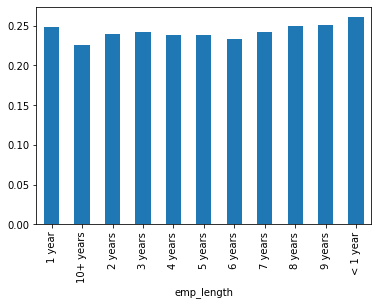

In [206]:
emplength.plot(kind = 'bar')

As we can see in the above bar plot values has not much difference so we can drop this column

In [207]:
df = df.drop('emp_length', axis=1)

In [208]:
# See what other missing values are in the df using isnull() 

In [209]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [210]:
# see if the purpose and title has the same information

In [211]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [212]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

As we can in above two columns the info is the same, so we can drop title column which has missing values.

In [213]:
df = df.drop('title', axis =1)

In [214]:
# another missing values are in the mort_acc

In [215]:
feature_info('mort_acc')

Number of mortgage accounts.


**TASK: Create a value_counts of the mort_acc column.**

In [216]:
# let's see value count of number of mortgage accounts

In [217]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [218]:
# there are 37795 values are missing for mortgage account column

In [219]:
# To fill in the missing values let's find out which column has the highest correlation with mortgage account column
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

As we can see total_acc has the positive highest correlation with the morr_acc.


In [220]:
df.groupby('total_acc').mean()          #mean values of the df grouping by total_acc

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,loan_repaid
total_acc,,,,,,,,,,,,
2.0,6672.222222,15.801111,210.881667,64277.777778,2.279444,1.611111,0.000000,2860.166667,53.527778,0.000000,0.000000,0.777778
3.0,6042.966361,15.615566,198.728318,41270.753884,6.502813,2.611621,0.045872,3382.807339,49.991022,0.052023,0.015480,0.779817
4.0,7587.399031,15.069491,250.050194,42426.565969,8.411963,3.324717,0.041195,4874.231826,58.477400,0.066743,0.022951,0.785945
5.0,7845.734714,14.917564,256.190325,44394.098003,10.118328,3.921598,0.071499,5475.253452,56.890311,0.103289,0.041171,0.796844
6.0,8529.019843,14.651752,278.518228,48470.001156,11.222542,4.511119,0.104003,6546.374957,57.812483,0.151293,0.055077,0.784126
...,...,...,...,...,...,...,...,...,...,...,...,...
124.0,23200.000000,17.860000,587.370000,66000.000000,14.040000,43.000000,0.000000,25497.000000,75.400000,1.000000,0.000000,0.000000
129.0,25000.000000,7.890000,505.600000,200000.000000,8.900000,48.000000,0.000000,27659.000000,8.300000,1.000000,0.000000,1.000000
135.0,24000.000000,15.410000,576.140000,82000.000000,33.850000,57.000000,0.000000,35715.000000,50.800000,3.000000,0.000000,1.000000


In [221]:
averageAccValues = df.groupby('total_acc').mean()['mort_acc']      #mean values of the mort_acc grouping by total_acc

In [222]:
# Let's fillout missing values of mort_acc with the above mean values of mort_acc ert total_acc

In [223]:
def fillin_mortAccount(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return averageAccValues[total_acc]
    else:
        return mort_acc

In [224]:
df['mort_acc'] = df.apply(lambda x: fillin_mortAccount(x['total_acc'],x['mort_acc']),axis=1)

In [225]:
# checking remaining missing values
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

revol_util and pub_rec_bankruptcies have missing data values which are less that 0.5% of the data. 0.5% of the data is very less so we can drop these two columns.

In [226]:
df = df.dropna()

In [227]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables


In [90]:
# list of all the non numeric data

In [228]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

#### term column:

In [229]:
# find out the meaning of term column

In [230]:
feature_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [231]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [ ]:
df['term'] = df['term'].apply(lambda term: int(term))

In [234]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

#### grade column:

In [235]:
# grade and sub grade are the parts of each other so we can remove grade column

df = df.drop('grade', axis=1)

#### subgrade column:

In [ ]:
# coverting sub grade column into dummy variables

In [236]:
# create new columns
df_dummies=pd.get_dummies(df['sub_grade'])
# add them to dataframe
df=df.join(df_dummies)
# drop original columns
df=df.drop('sub_grade',axis=1)

In [237]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'],
      dtype='object')

#### verification_status, application_type,initial_list_status,purpose :


In [238]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [239]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [242]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [243]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [244]:
# create new columns
df_dummies=pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']])
# add them to dataframe
df=df.join(df_dummies)
# drop original columns
df=df.drop('verification_status',axis=1)
df=df.drop('application_type',axis=1)
df=df.drop('initial_list_status',axis=1)
df=df.drop('purpose',axis=1)

In [245]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A1',
       'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3',
       'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5',
       'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_DIRECT_PAY', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_f',
       'initial_list_status_w', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', '

#### home_ownership:


In [246]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

other, none and any categories are less in number so we can move any and none data into other category.

In [247]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [248]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [249]:
# create new columns
df_dummies=pd.get_dummies(df['home_ownership'])
# add them to dataframe
df=df.join(df_dummies)
# drop original columns
df=df.drop('home_ownership',axis=1)

#### address


In [250]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [251]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [252]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [253]:
# create new columns
df_dummies=pd.get_dummies(df['zip_code'])
# add them to dataframe
df=df.join(df_dummies)
# drop original columns
df=df.drop('address',axis=1)

#### issue_d :



In [254]:
feature_info('issue_d')

The month which the loan was funded


In [255]:
# this is a data leakage because we wouldn't know if the loan would be ussued
# dropping this column
df = df.drop('issue_d', axis =1)

#### earliest_cr_line:


In [257]:
feature_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [138]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [258]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [259]:
df['earliest_cr_line'] 

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

we dont need to convert these to dummy variables as it will be considered as a continuous variables

## Train Test Split

In [275]:
from sklearn.model_selection import train_test_split

We have created new column named loan_repaid for stating loan_status so I am removing the loan_status column to avoid duplicate data.

In [262]:
feature_info('loan_status')

Current status of the loan


In [264]:
df = df.drop('loan_status', axis = 1)

Set X and y variables to the .values of the features and label.

In [276]:
X = df.drop('loan_repaid', axis = 1).values

In [277]:
y = df['loan_repaid'].values

In [279]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data



In [ ]:
# we are fitting data only on train set to avoid data leakage

In [281]:
from sklearn.preprocessing import MinMaxScaler

In [282]:
scaler = MinMaxScaler()

In [283]:
X_train = scaler.fit_transform(X_train)

In [284]:
X_test = scaler.transform(X_test)

# Creating the Model



In [318]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [319]:
X_train.shape

(316175, 86)

In [320]:
# Total # of fetures are 86 so I am using input units 86
model = Sequential()

model.add(Dense(86, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(43, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(21, activation = 'relu'))
model.add(Dropout(0.4))

# we are using sigmoid because output values will be 0 or 1
model.add(Dense(1, activation = 'sigmoid')) 

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [321]:
# Using batch_size - 256 as the data size is large
model.fit(x = X_train, y = y_train, epochs=30, batch_size = 256,
         validation_data=(X_test, y_test))

Epoch 1/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.3163 - val_loss: 0.2634
Epoch 2/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2691 - val_loss: 0.2629
Epoch 3/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2651 - val_loss: 0.2622
Epoch 4/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2636 - val_loss: 0.2619
Epoch 5/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2628 - val_loss: 0.2628
Epoch 6/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2619 - val_loss: 0.2619
Epoch 7/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2618 - val_loss: 0.2618
Epoch 8/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2614 - val_loss: 0.2623
Epoch 9/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2613 - val_loss: 0.2614
Epoch 10/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.260

Saving the model to use it for later

In [291]:
from tensorflow.keras.models import load_model

In [292]:
model.save('mymodel.h5')

# Section 3: Evaluating Model Performance.



In [137]:
# Plot of the validation loss versus the training loss

In [322]:
losses = pd.DataFrame(model.history.history)

In [323]:
losses

,loss,val_loss
0,0.316252,0.263449
1,0.269148,0.262879
2,0.265072,0.262158
3,0.263623,0.261903
4,0.262760,0.262813
5,0.261876,0.261904
6,0.261803,0.261816
7,0.261424,0.262278
8,0.261288,0.261397
9,0.260609,0.261877


<AxesSubplot:>

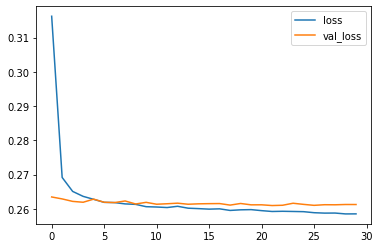

In [324]:
losses.plot()

Displaying classifiaction report and confusion matrix

In [325]:
from sklearn.metrics import classification_report, confusion_matrix

In [326]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

In [327]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



89% accuracy is not good because of the imbalance data, around 80% of the data is belongs to 1 class. We can try to increase the recall and f1 score values by changing units and dropout values.

In [328]:
print(confusion_matrix(y_test, y_pred))

[[ 6744  8914]
 [   16 63370]]


let's check id our model is predicting correctly for the random customer

In [329]:
import random
random.seed(10)
random_index = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_index]
new_customer

loan_amnt       24000
term               36
int_rate         6.49
installment    735.47
annual_inc     150000
                ...  
30723               1
48052               0
70466               0
86630               0
93700               0
Name: 300203, Length: 86, dtype: object

In [330]:
new_customer = scaler.transform(new_customer.values.reshape(1,86))

In [331]:
new_customer

array([[0.58974359, 0.        , 0.0455785 , 0.47267395, 0.01722835,
        0.00143514, 0.89855072, 0.12      , 0.01162791, 0.0115949 ,
        0.05166424, 0.14765101, 0.14705882, 0.125     , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.  

In [332]:
y_predict = model.predict(new_customer)
y_predict = np.round(y_predict).astype(int)
y_predict

array([[1]])

Now checking did this person actually end up paying back their loan

In [333]:
df.iloc[random_index]['loan_repaid']

1

As we can see above our model is predicting correct for the random customer